In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import KNNImputer
from sklearn import preprocessing

In [2]:
data = pd.read_csv('C:/Users/rezam/OneDrive - Louisiana State University/PhD Courses/EE 7600 Machine Learning/Project_2/weather_rain.csv')
data.head(10)

,MinTemp,MaxTemp,Rainfall,Wind Gust Speed,Wind Speed 9am,Wind Speed 3pm,Humidity 9am,Humidity 3pm,Pressure 9am,Pressure 3pm,Temp 9am,Temp 3pm,Rain Today,Rain Tomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0.0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0.0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0.0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0.0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0.0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0.0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0.0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1.0
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          143975 non-null  float64
 1   MaxTemp          144199 non-null  float64
 2   Rainfall         142199 non-null  float64
 3   Wind Gust Speed  135197 non-null  float64
 4   Wind Speed 9am   143693 non-null  float64
 5   Wind Speed 3pm   142398 non-null  float64
 6   Humidity 9am     142806 non-null  float64
 7   Humidity 3pm     140953 non-null  float64
 8   Pressure 9am     130395 non-null  float64
 9   Pressure 3pm     130432 non-null  float64
 10  Temp 9am         143693 non-null  float64
 11  Temp 3pm         141851 non-null  float64
 12  Rain Today       145460 non-null  int64  
 13  Rain Tomorrow    142193 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 15.5 MB


In [4]:
print(data.keys(), '\n')

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Wind Gust Speed', 'Wind Speed 9am',
       'Wind Speed 3pm', 'Humidity 9am', 'Humidity 3pm', 'Pressure 9am',
       'Pressure 3pm', 'Temp 9am', 'Temp 3pm', 'Rain Today', 'Rain Tomorrow'],
      dtype='object') 



In [5]:
data.shape

(145460, 14)

In [6]:
data.describe() #Data Describtion

,MinTemp,MaxTemp,Rainfall,Wind Gust Speed,Wind Speed 9am,Wind Speed 3pm,Humidity 9am,Humidity 3pm,Pressure 9am,Pressure 3pm,Temp 9am,Temp 3pm,Rain Today,Rain Tomorrow
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,143693.000000,141851.00000,145460.000000,142193.000000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339,0.219167,0.224181
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665,0.413683,0.417043
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000,0.000000,0.000000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000,0.000000,0.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000,1.000000,1.000000


In [7]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Wind Gust Speed,Wind Speed 9am,Wind Speed 3pm,Humidity 9am,Humidity 3pm,Pressure 9am,Pressure 3pm,Temp 9am,Temp 3pm,Rain Today,Rain Tomorrow
MinTemp,1.000000,0.736555,0.103938,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.901821,0.708906,0.054702,0.083936
MaxTemp,0.736555,1.000000,-0.074992,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,0.887210,0.984503,-0.226001,-0.159237
Rainfall,0.103938,-0.074992,1.000000,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.011192,-0.079657,0.501516,0.239032
Wind Gust Speed,0.177415,0.067615,0.133659,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.150150,0.032748,0.151605,0.234010
Wind Speed 9am,0.175064,0.014450,0.087338,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.128545,0.004569,0.099084,0.090995
Wind Speed 3pm,0.175173,0.050300,0.057887,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.163030,0.027778,0.077913,0.087817
Humidity 9am,-0.232899,-0.504110,0.224405,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,-0.471354,-0.498399,0.349752,0.257161
Humidity 3pm,0.006089,-0.508855,0.255755,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,-0.221019,-0.557841,0.373596,0.446160
Pressure 9am,-0.450970,-0.332061,-0.168154,-0.458744,-0.228743,-0.296351,0.139442,-0.027544,1.000000,0.961326,-0.422556,-0.286770,-0.187547,-0.246371
Pressure 3pm,-0.461292,-0.427167,-0.126534,-0.413749,-0.175817,-0.255439,0.186858,0.051997,0.961326,1.000000,-0.470187,-0.389548,-0.104862,-0.226031


### Categorical features in Dataset:

In [8]:
categorical_features = [column_name for column_name in data.columns if data[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 0
Categorical Features:  []


### Numerical Features in Dataset:

In [9]:
numerical_features = [column_name for column_name in data.columns if data[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 14
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Wind Gust Speed', 'Wind Speed 9am', 'Wind Speed 3pm', 'Humidity 9am', 'Humidity 3pm', 'Pressure 9am', 'Pressure 3pm', 'Temp 9am', 'Temp 3pm', 'Rain Today', 'Rain Tomorrow']


 ### Handling Missing values in Numerical features:

In [10]:
numerical_features = [column_name for column_name in data.columns if data[column_name].dtype != 'O']
data[numerical_features].isnull().sum()

MinTemp             1485
MaxTemp             1261
Rainfall            3261
Wind Gust Speed    10263
Wind Speed 9am      1767
Wind Speed 3pm      3062
Humidity 9am        2654
Humidity 3pm        4507
Pressure 9am       15065
Pressure 3pm       15028
Temp 9am            1767
Temp 3pm            3609
Rain Today             0
Rain Tomorrow       3267
dtype: int64

In [11]:
## finding all columns that have nan:

droping_list_all = []
for j in range(0,14):
    if not data.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]

In [12]:
# filling nan with mean in any columns
# for j in range(0,14):        
#         data.iloc[:,j] = data.iloc[:,j].fillna(data.iloc[:,j].mean())
# # data.fillna(method='ffill')

In [13]:
# Droping the samples with issing values
new_data = data.dropna(axis=0)

In [14]:
new_data['Rain Tomorrow'].value_counts()

0.0    93403
1.0    26187
Name: Rain Tomorrow, dtype: int64

In [15]:
# check to make sure that there are not more any nan
new_data.isnull().sum()

MinTemp            0
MaxTemp            0
Rainfall           0
Wind Gust Speed    0
Wind Speed 9am     0
Wind Speed 3pm     0
Humidity 9am       0
Humidity 3pm       0
Pressure 9am       0
Pressure 3pm       0
Temp 9am           0
Temp 3pm           0
Rain Today         0
Rain Tomorrow      0
dtype: int64

<AxesSubplot:>

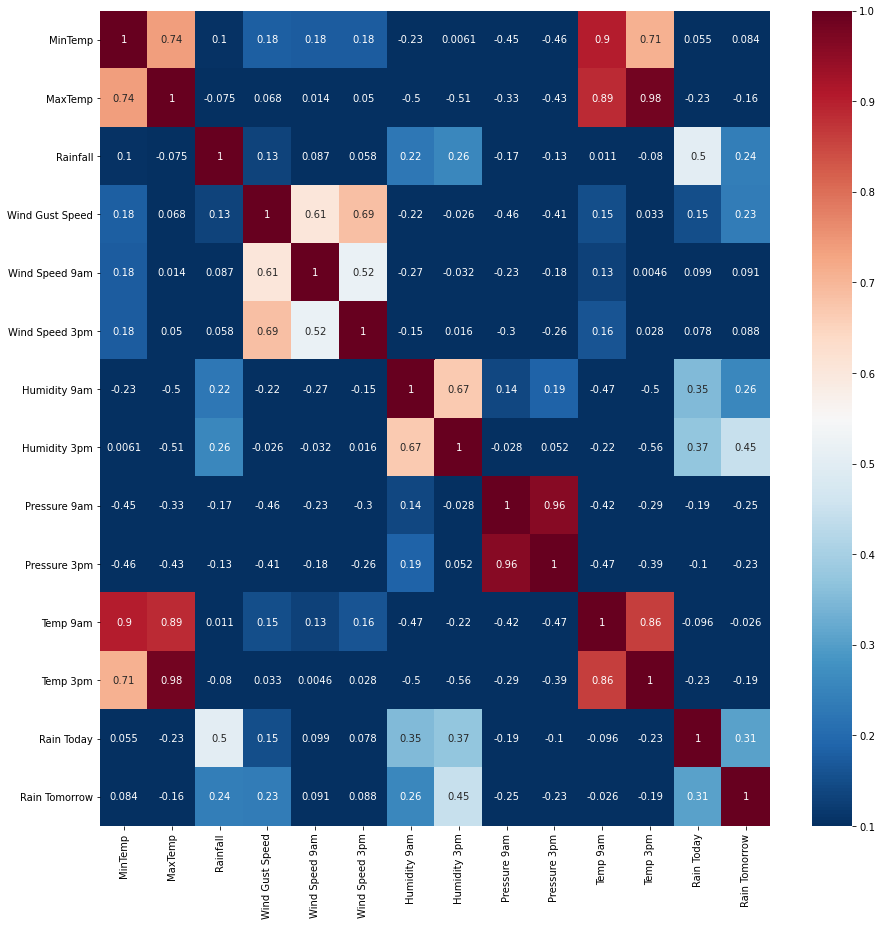

In [16]:
plt.figure(figsize = (15,15))
sb.heatmap(data.corr(), annot=True, cmap="RdBu_r", vmin=0.1, vmax=1)

In [17]:
new_data.describe()

,MinTemp,MaxTemp,Rainfall,Wind Gust Speed,Wind Speed 9am,Wind Speed 3pm,Humidity 9am,Humidity 3pm,Pressure 9am,Pressure 3pm,Temp 9am,Temp 3pm,Rain Today,Rain Tomorrow
count,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000
mean,12.386547,23.485962,2.320947,40.107643,14.363818,19.082239,68.289782,50.866143,1017.655685,1015.252962,17.185827,21.978666,0.221055,0.218973
std,6.367537,6.986581,8.465116,13.479752,8.796346,8.675334,19.129275,20.691785,7.098486,7.019410,6.449422,6.832804,0.414959,0.413552
min,-8.200000,2.600000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,0.000000,0.000000
25%,7.700000,18.100000,0.000000,31.000000,7.000000,13.000000,56.000000,36.000000,1013.000000,1010.500000,12.400000,16.800000,0.000000,0.000000
50%,12.100000,22.900000,0.000000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.600000,1015.200000,16.800000,21.400000,0.000000,0.000000
75%,17.000000,28.500000,0.600000,48.000000,20.000000,24.000000,82.000000,65.000000,1022.400000,1020.000000,21.800000,26.700000,0.000000,0.000000
max,33.900000,48.100000,367.600000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000


In [18]:
new_data.corr()

,MinTemp,MaxTemp,Rainfall,Wind Gust Speed,Wind Speed 9am,Wind Speed 3pm,Humidity 9am,Humidity 3pm,Pressure 9am,Pressure 3pm,Temp 9am,Temp 3pm,Rain Today,Rain Tomorrow
MinTemp,1.000000,0.730847,0.111056,0.196271,0.202151,0.174924,-0.246198,0.022010,-0.452259,-0.462918,0.903063,0.705664,0.059705,0.088019
MaxTemp,0.730847,1.000000,-0.069919,0.088960,0.031689,0.043566,-0.524089,-0.498725,-0.329495,-0.423235,0.882847,0.984664,-0.230526,-0.160257
Rainfall,0.111056,-0.069919,1.000000,0.132181,0.088755,0.062222,0.225369,0.256475,-0.170048,-0.129840,0.016859,-0.073976,0.498260,0.237833
Wind Gust Speed,0.196271,0.088960,0.132181,1.000000,0.601607,0.689196,-0.219812,-0.035465,-0.458368,-0.414285,0.166590,0.049537,0.156059,0.236001
Wind Speed 9am,0.202151,0.031689,0.088755,0.601607,1.000000,0.514095,-0.269313,-0.029133,-0.230349,-0.179586,0.146655,0.015775,0.104508,0.095100
Wind Speed 3pm,0.174924,0.043566,0.062222,0.689196,0.514095,1.000000,-0.132539,0.032595,-0.300103,-0.261171,0.160787,0.017175,0.088558,0.093832
Humidity 9am,-0.246198,-0.524089,0.225369,-0.219812,-0.269313,-0.132539,1.000000,0.675197,0.141992,0.189512,-0.483699,-0.515859,0.357774,0.261379
Humidity 3pm,0.022010,-0.498725,0.256475,-0.035465,-0.029133,0.032595,0.675197,1.000000,-0.027530,0.051399,-0.203843,-0.547731,0.382301,0.452645
Pressure 9am,-0.452259,-0.329495,-0.170048,-0.458368,-0.230349,-0.300103,0.141992,-0.027530,1.000000,0.961637,-0.420934,-0.287466,-0.192796,-0.246457
Pressure 3pm,-0.462918,-0.423235,-0.129840,-0.414285,-0.179586,-0.261171,0.189512,0.051399,0.961637,1.000000,-0.468120,-0.390239,-0.110973,-0.228156


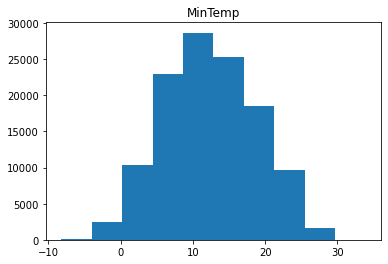

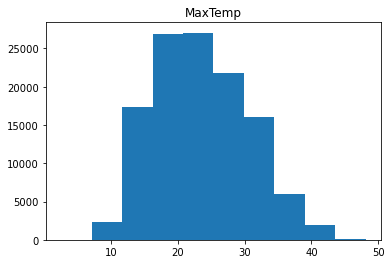

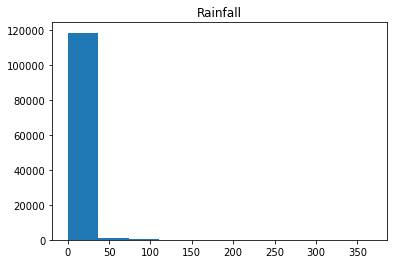

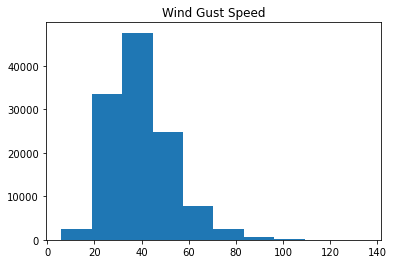

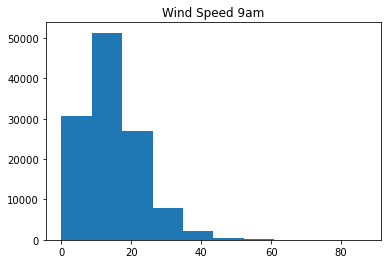

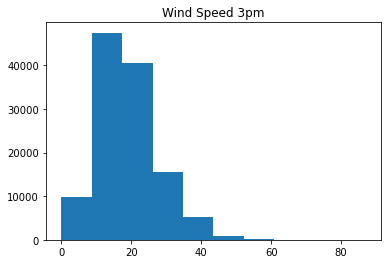

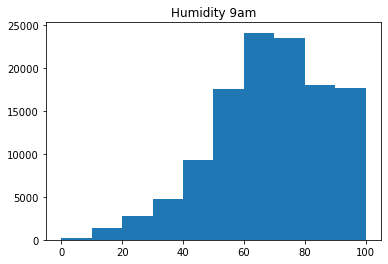

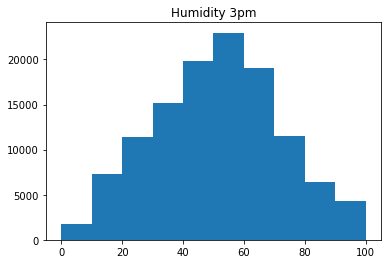

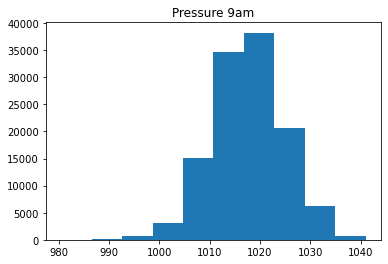

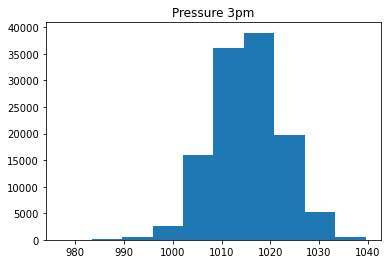

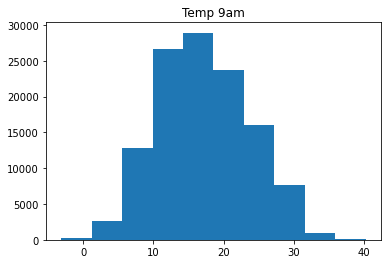

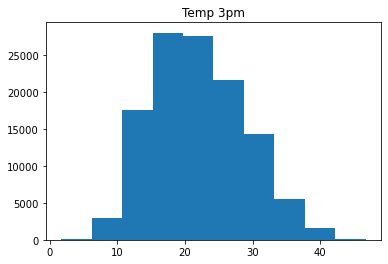

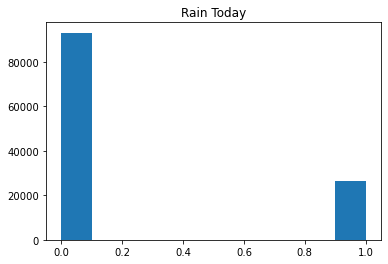

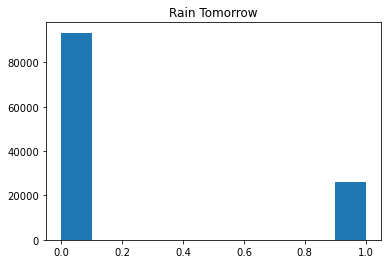

In [19]:
for i in data.columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(new_data[i])

### Exploring target variable:

<AxesSubplot:>

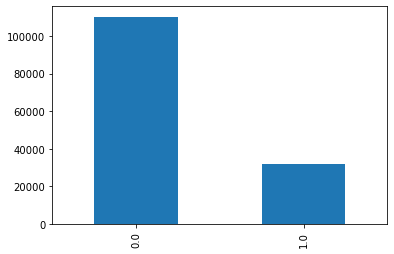

In [20]:
data['Rain Tomorrow'].value_counts().plot(kind='bar')

In [24]:
data['Rain Tomorrow'].value_counts()

0.0    110316
1.0     31877
Name: Rain Tomorrow, dtype: int64

In [25]:
X = new_data.drop(['Rain Tomorrow'],axis=1)
y = new_data['Rain Tomorrow']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) #, stratify=y

In [40]:
new_data.shape

(119590, 14)

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
train_error = 1-gnb.score(X_train, y_train)
test_error = 1-gnb.score(X_test, y_test)
print('Train error is:',train_error)
print('Test error is:',test_error)

Train error is: 0.18446358391169826
Test error is: 0.1850071076176938


In [42]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix for training set:', '\n', confusion_matrix(y_train, gnb.predict(X_train)))
print('Confusion matrix for testing set:', '\n', confusion_matrix(y_test, gnb.predict(X_test)))

Confusion matrix for training set: 
 [[66902  7813]
 [ 9835 11122]]
Confusion matrix for testing set: 
 [[16742  1946]
 [ 2479  2751]]


### feature scaling:

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score
train_error = 1-gnb.score(X_train_scaled, y_train)
test_error = 1-gnb.score(X_test_scaled, y_test)
print('Train error is:',train_error)
print('Test error is:',test_error)

Train error is: 0.18446358391169826
Test error is: 0.1860105359979931


In [44]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix for training set:', '\n', confusion_matrix(y_train, gnb.predict(X_train_scaled)))
print('Confusion matrix for testing set:', '\n', confusion_matrix(y_test, gnb.predict(X_test_scaled)))

Confusion matrix for training set: 
 [[66902  7813]
 [ 9835 11122]]
Confusion matrix for testing set: 
 [[16707  1981]
 [ 2468  2762]]


## Logistic Regression Classifier

In [45]:
from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0, penalty='l1', solver='liblinear') # 'liblinear' and 'saga' handle L1 penalty
clf = LogisticRegression(random_state=0, penalty='l2', solver='lbfgs') # 'newton-cg', 'lbfgs', 'sag' and 'saga' handle L2 or no penalty
clf.fit(X_train, y_train)

train_error = 1-clf.score(X_train, y_train)
test_error = 1-clf.score(X_test, y_test)
print('Train error is:',train_error)
print('Test error is:',test_error)

print('Confusion matrix for training set:', '\n', confusion_matrix(y_train, clf.predict(X_train)))
print('Confusion matrix for testing set:', '\n', confusion_matrix(y_test, clf.predict(X_test)))

Train error is: 0.15175809014131614
Test error is: 0.15423530395518015
Confusion matrix for training set: 
 [[71023  3692]
 [10827 10130]]
Confusion matrix for testing set: 
 [[17730   958]
 [ 2731  2499]]


C:\Users\rezam\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.1308751  0.01489489 0.06069982 0.88064085 0.09533777 0.37239473
 0.09099893 1.33302578 1.17157371 1.61580715 0.01494956 0.30223458
 0.22362742]


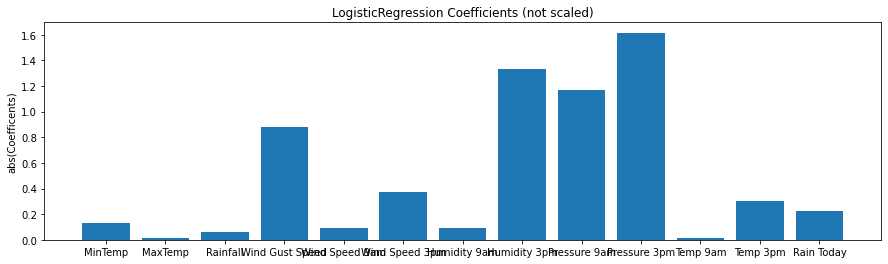

In [49]:
coef = abs(clf.coef_[0])
print (coef)

plt.figure(figsize=(15,4))
plt.bar(range(13), coef)
plt.title('LogisticRegression Coefficients (not scaled)')
plt.xticks(range(13), features)
plt.ylabel('abs(Coefficents)')
plt.show()

### Scaled Logistic Regression

In [47]:
features = data.keys()
features = features.drop(['Rain Tomorrow'])
features

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Wind Gust Speed', 'Wind Speed 9am',
       'Wind Speed 3pm', 'Humidity 9am', 'Humidity 3pm', 'Pressure 9am',
       'Pressure 3pm', 'Temp 9am', 'Temp 3pm', 'Rain Today'],
      dtype='object')

Train error is: 0.14899866209549295
Test error is: 0.15034701898152014
Confusion matrix for training set: 
 [[70924  3791]
 [10464 10493]]
Confusion matrix for testing set: 
 [[17695   993]
 [ 2603  2627]]
[0.1308751  0.01489489 0.06069982 0.88064085 0.09533777 0.37239473
 0.09099893 1.33302578 1.17157371 1.61580715 0.01494956 0.30223458
 0.22362742]


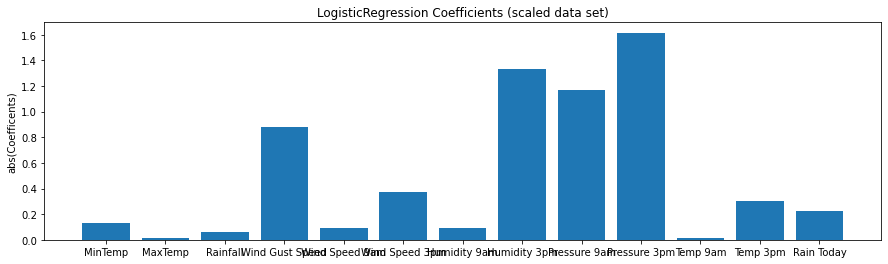

In [48]:
clf = LogisticRegression(random_state=0, penalty='l1', solver='liblinear') # 'liblinear' and 'saga' handle L1 penalty
# clf = LogisticRegression(random_state=0, penalty='l2', solver='lbfgs') # 'newton-cg', 'lbfgs', 'sag' and 'saga' handle L2 or no penalty
clf.fit(X_train_scaled, y_train)

train_error = 1-clf.score(X_train_scaled, y_train)
test_error = 1-clf.score(X_test_scaled, y_test)
print('Train error is:',train_error)
print('Test error is:',test_error)

print('Confusion matrix for training set:', '\n', confusion_matrix(y_train, clf.predict(X_train_scaled)))
print('Confusion matrix for testing set:', '\n', confusion_matrix(y_test, clf.predict(X_test_scaled)))

coef = abs(clf.coef_[0])
print (coef)

plt.figure(figsize=(15,4))
plt.bar(range(13), coef)
plt.title('LogisticRegression Coefficients (scaled data set)')
plt.xticks(range(13), features)
plt.ylabel('abs(Coefficents)')
plt.show()